In [1]:
import pandas as pd
from dglchem.utils.data import MakeGraphDataSet, DataSet

df = pd.read_excel('/Users/faerte/Desktop/dgl_chem/data-sets/BradleyDoublePlusGoodMeltingPointDataset.xlsx')

# Making a graph dataset
data = MakeGraphDataSet(smiles = df.smiles, target = df.mpC, log=False)
#%timeit MakeGraphDataSet(smiles = df.smiles, target = df.mpC, log=False)

In [2]:
print(len(data.train))
print(len(data.test))
print(len(data.val))

NameError: name 'data' is not defined

In [3]:
import pandas as pd
from dglchem.utils.data import DataSet

df = pd.read_excel('/Users/faerte/Desktop/dgl_chem/data-sets/BradleyDoublePlusGoodMeltingPointDataset.xlsx')

# Making a graph dataset
df[['smiles','mpC']]

,smiles,mpC
0,C1(CCC1)C,-161.51
1,[O-][N+]#N,-90.80
2,FS(F)(=O)=O,-135.80
3,CC(C)N(CCC(c1ccccn1)(c2ccccc2)C(N)=O)C(C)C,94.80
4,BrBr,-7.20
...,...,...
3036,C1=CC(=CC=C1C(=O)O)[N+](=O)[O-],240.00
3037,C1CC(=O)NC(=O)C1N2C(=O)C3=CC=CC=C3C2=O,275.00
3038,C[C@]12CC[C@H]3[C@H]([C@@H]1CC[C@@H]2O)CCC4=C3...,176.00
3039,C1=C(C=C(C(=C1Cl)O)Cl)Cl,65.00


In [ ]:
from torch_geometric.loader import DataLoader
batch_size = 32
train = DataLoader(data.train, batch_size=batch_size)
test = DataLoader(data.test, batch_size=batch_size)
val = DataLoader(data.val, batch_size=batch_size)

In [8]:
print(train)
print(test)
print(val)

Comparing my atom featurizer speed to the DGL LifeSci one:

In [1]:
from dglchem.utils.featurizer import AtomFeaturizer
from dglchem.utils.featurizer_old import AtomFeaturizerOld
from rdkit import Chem
feats = ['atom_type_one_hot','atom_degree_one_hot']
mol = Chem.MolFromSmiles('COO')
featurizer = AtomFeaturizer(atom_feature_list=feats)
featurizerold = AtomFeaturizerOld(atom_feature_list=feats)

assert((featurizer(mol)==featurizerold(mol)['h']).all())

%timeit featurizer(mol)
%timeit featurizerold(mol)

16.2 µs ± 53.3 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
15.9 µs ± 30.6 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


My implementation of the featurizer is only marginally slower than the DGL LifeSci one

In [1]:
from dglchem.utils.featurizer import BondFeaturizer
from dglchem.utils.featurizer_old import BondFeaturizerOld
from rdkit import Chem
feats = ['bond_type_one_hot','bond_is_conjugated_one_hot']
mol = Chem.MolFromSmiles('COO')
featurizer = BondFeaturizer(bond_feature_list=feats)
featurizerold = BondFeaturizerOld(bond_feature_list=feats)

assert((featurizer(mol)==featurizerold(mol)['e']).all())

%timeit featurizer(mol)
%timeit featurizerold(mol)

12.8 µs ± 22.4 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
12.1 µs ± 19.4 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [5]:
from torch_geometric.data import download_url
download_url('https://figshare.com/ndownloader/files/1503991', filename='bradley.xlsx', folder='./data', log=True)

'./data/bradley.xlsx'

In [1]:
from dglchem.data import BradleyDoublePlus
data = BradleyDoublePlus(target='mpC')

In [1]:
from dglchem.data import BradleyDoublePlus
data_ = BradleyDoublePlus(target='mpC')
data_set = data_.data

from dglchem.utils import split_data
print(split_data(data_set)[0][0])

Data(x=[8, 37], edge_index=[2, 16], edge_attr=[16, 10], y=-0.32850121135881694)


In [1]:
from dglchem.data import BradleyDoublePlus
from dglchem.utils import split_data
data = BradleyDoublePlus(target='mpC')
print(len(data))
import numpy as np
custom = np.random.randint(low=0, high=3, size=[len(data)])
print(custom.dtype)
split_data(data, custom_split=custom)

3023
int64


([Data(x=[3, 37], edge_index=[2, 4], edge_attr=[4, 10], y=-1.6033870838952407),
  Data(x=[25, 37], edge_index=[2, 54], edge_attr=[54, 10], y=1.8564940751106287),
  Data(x=[5, 37], edge_index=[2, 8], edge_attr=[8, 10], y=-0.8937215489365419),
  Data(x=[2, 37], edge_index=[2, 2], edge_attr=[2, 10], y=0.535029859940485),
  Data(x=[2, 37], edge_index=[2, 2], edge_attr=[2, 10], y=-1.4987166510104768),
  Data(x=[4, 37], edge_index=[2, 6], edge_attr=[6, 10], y=-1.6682827522837946),
  Data(x=[9, 37], edge_index=[2, 16], edge_attr=[16, 10], y=0.917076939969873),
  Data(x=[6, 37], edge_index=[2, 12], edge_attr=[12, 10], y=-1.406606670071885),
  Data(x=[8, 37], edge_index=[2, 14], edge_attr=[14, 10], y=-1.4484748432257903),
  Data(x=[6, 37], edge_index=[2, 10], edge_attr=[10, 10], y=-1.626414579129889),
  Data(x=[8, 37], edge_index=[2, 14], edge_attr=[14, 10], y=-1.7101509254377),
  Data(x=[8, 37], edge_index=[2, 14], edge_attr=[14, 10], y=-1.9194917912072278),
  Data(x=[10, 37], edge_index=[2, 2

In [4]:
data.save_data_set('save_test2')

File saved at: ./data/processed/save_test2.pickle


In [2]:
print([i for i in range(6)])

[0, 1, 2, 3, 4, 5]


In [2]:
import numpy as np
gauss = [134.07, 135.18, 134.09, 135.02, 134.32405, 132.64]
mog = [137.11598, 140.60359, 139.20227, 136.7189, 135.44025, 132.1304]
flow = [132.93988, 118.6535, 120.14544, 117.1342, 126.1782, 124.3388]
vamp = [132.72827, 132.44489, 133.10184, 131.90646, 132.20265, 132.86716]
all_d = [gauss, mog, flow, vamp]
labels = ['gauss','mog','flow','vamp']

for i in range(len(labels)):
    print(f'mean of {labels[i]}: {np.round(np.mean(all_d[i]),2)}')
    print(f'std of {labels[i]}: {np.round(np.std(all_d[i]),2)}')

mean of gauss: 134.22
std of gauss: 0.83
mean of mog: 136.87
std of mog: 2.71
mean of flow: 123.23
std of flow: 5.35
mean of vamp: 132.54
std of vamp: 0.4


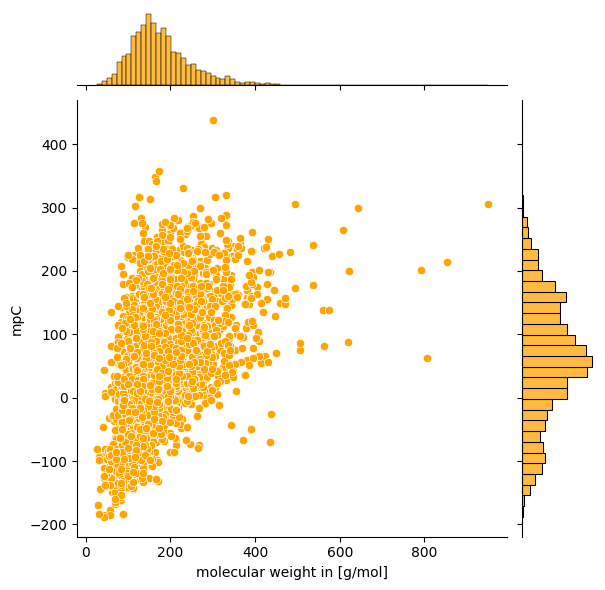

In [1]:
from dglchem.data import BradleyDoublePlus

dataset = BradleyDoublePlus(target_string='mpC', global_features=['min'], log=False)
dataset.weight_vs_target_plot('mpC', save_fig=True)